# Mushroom Classification with Decision Tree and Logistic Regression

 Here we analyzed a mushroom dataset to classify mushrooms as edible or poisonous using machine learning models. Here's an overview of the steps:

### Data Exploration and Preprocessing: 
 We loaded the dataset, checked for missing values, separated features and target, and encoded categorical variables using one-hot encoding.

### Data Visualization: 
 We visualized the distribution of mushroom classes, odors, and cap shapes to understand patterns in the data.

### Model Building:

### 1)Decision Tree Classifier: 
 We built two decision tree models using Gini Index and Entropy as criteria. We evaluated their accuracy and visualized the confusion matrix.
### 2)Logistic Regression with Feature Selection: 
 We applied Recursive Feature Elimination (RFE) to select the top 10 features and trained a logistic regression model. We then evaluated it using accuracy, confusion matrix, and classification report.

This comprehensive approach provided insights into the factors affecting mushroom edibility and demonstrated the effectiveness of different classification techniques. 

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the Dataset

In [3]:
dataset = pd.read_csv('mushrooms.csv')

# Check for null values
dataset.isnull().sum().sum()  # This checks if there are any missing values in the dataset

0

## 2. Explore the Data

In [5]:
# Display the columns in the dataset
print(dataset.columns)

# Display unique values in the target variable 'class'
dataset['class'].unique()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


array(['p', 'e'], dtype=object)

## 3. Data Preprocessing

In [6]:
# Separate features (X) and target (y)
X = dataset.drop(['class'], axis=1)
y = dataset['class']

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X)

## 4. Visualize Data Distribution

#### Visualize the distribution of classes (Edible vs. Poisonous)

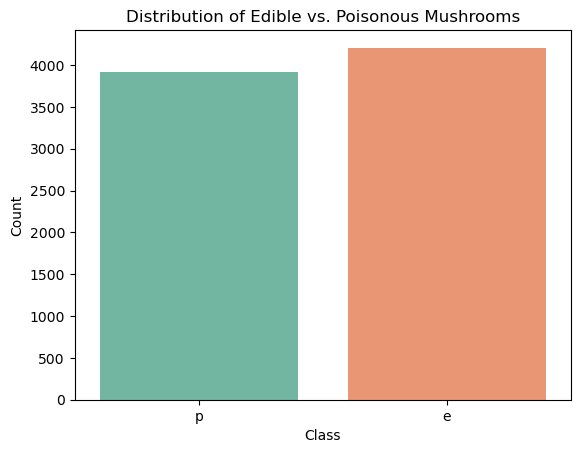

In [7]:
sns.countplot(x='class', data=dataset, palette='Set2')
plt.title('Distribution of Edible vs. Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Visualize the distribution of mushroom odor by class

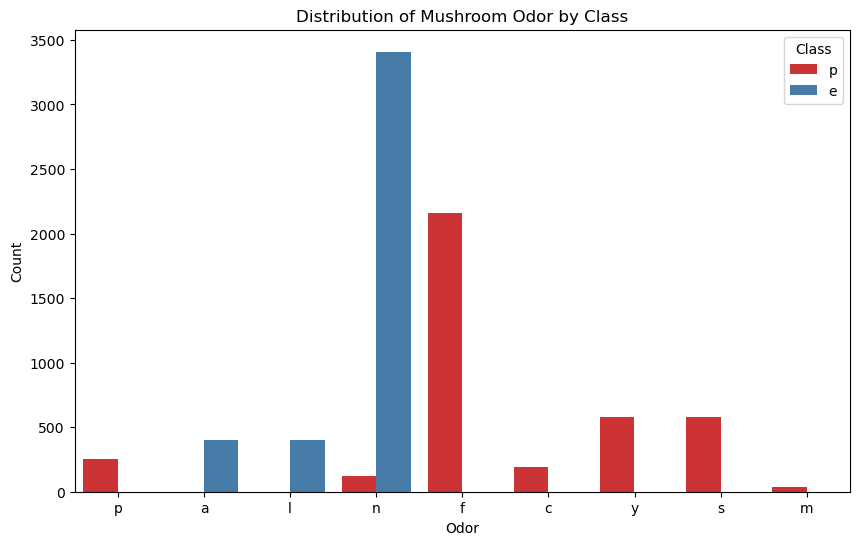

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='odor', hue='class', data=dataset, palette='Set1')
plt.title('Distribution of Mushroom Odor by Class')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

#### Correlation Heatmap

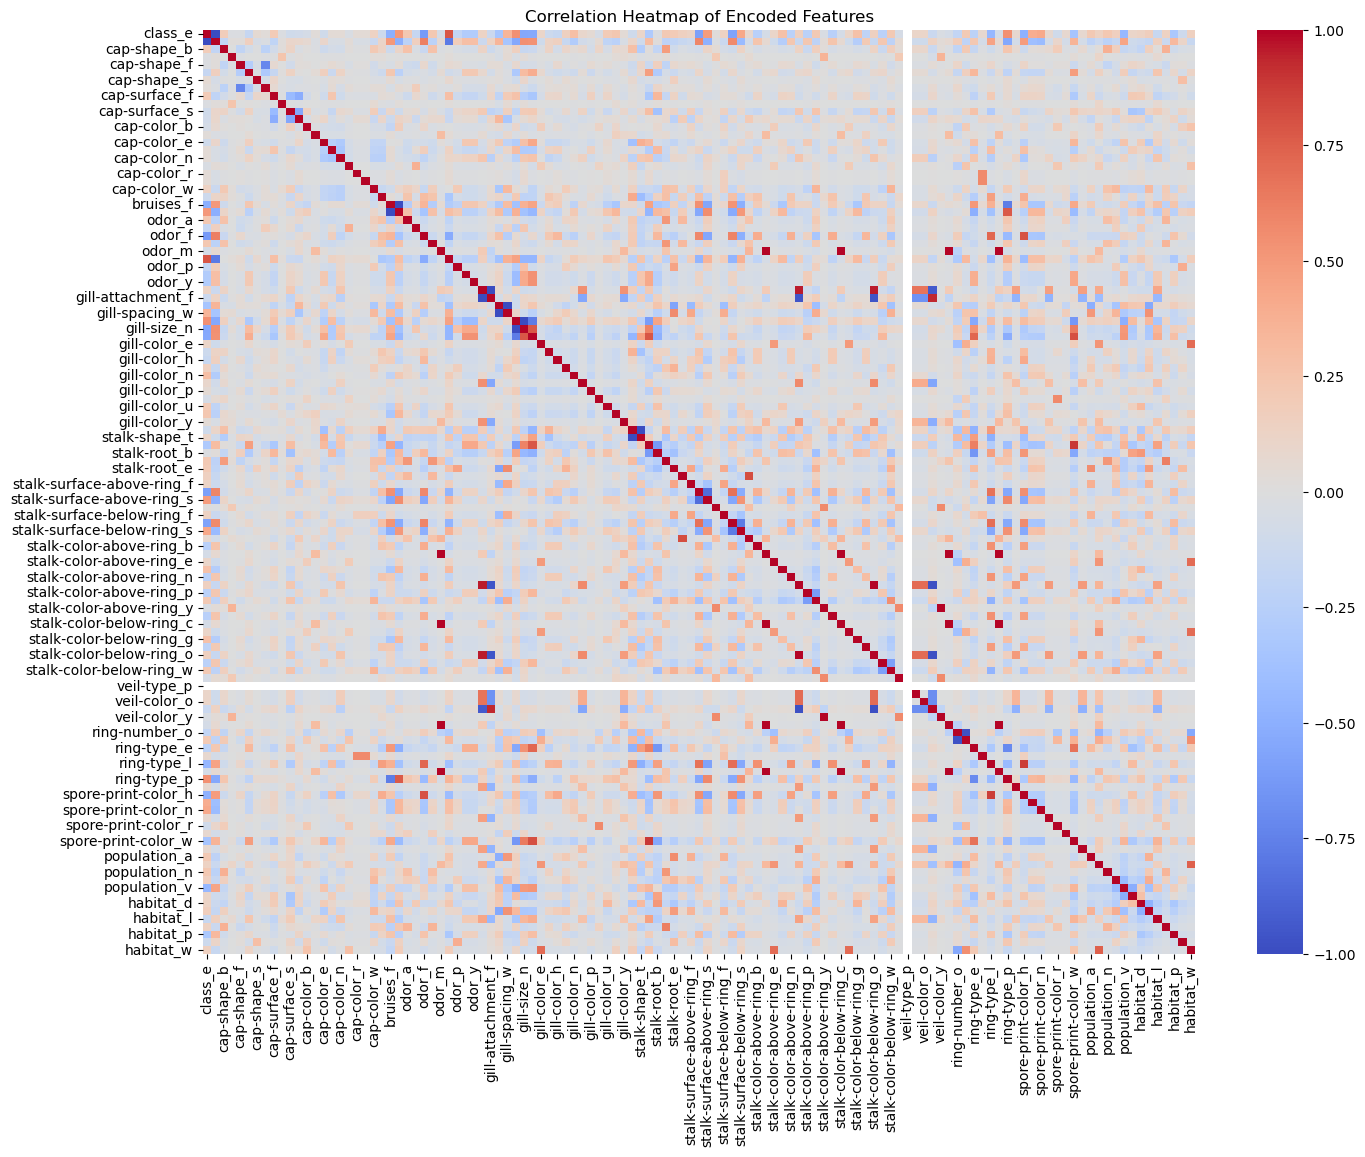

In [9]:
encoded_dataset = pd.get_dummies(dataset)

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(encoded_dataset.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

#### Visualize Cap Shape Distribution by Class

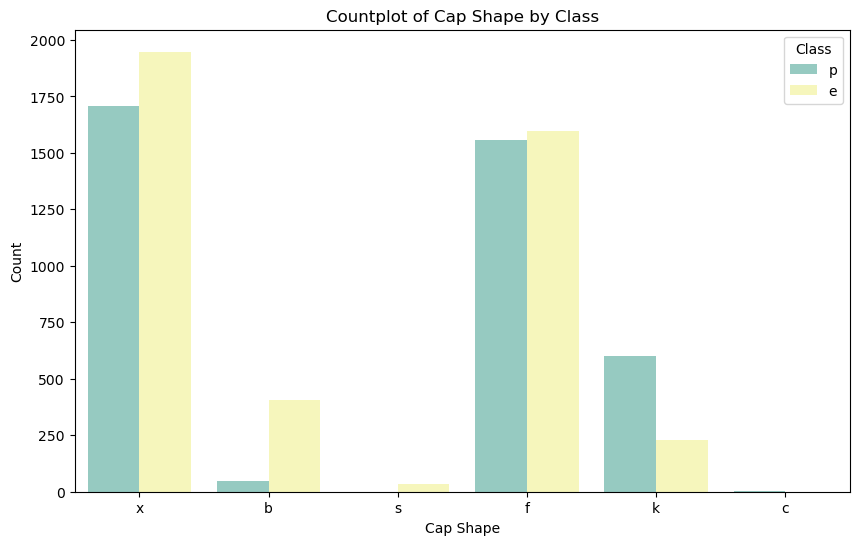

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-shape', hue='class', data=dataset, palette='Set3')
plt.title('Countplot of Cap Shape by Class')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

#### Pie Chart for Cap Shape Distribution

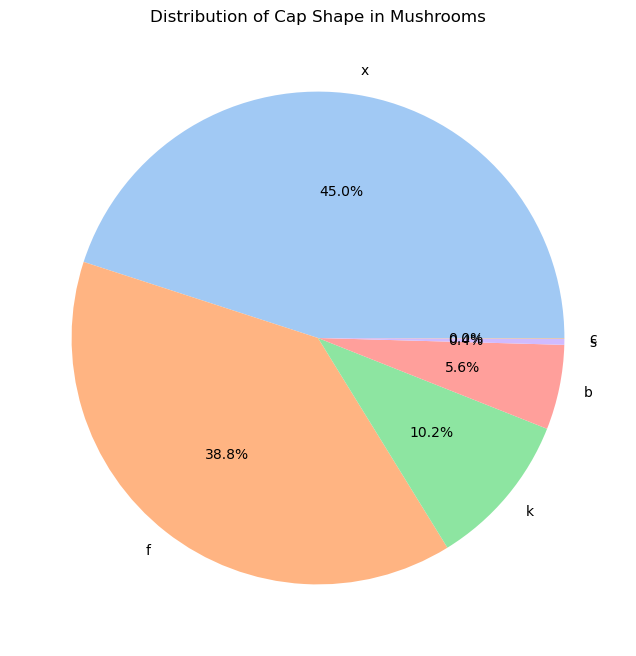

In [11]:
cap_shape_counts = dataset['cap-shape'].value_counts()

# Pie chart for cap shape distribution
plt.figure(figsize=(8, 8))
plt.pie(cap_shape_counts, labels=cap_shape_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(cap_shape_counts)))
plt.title('Distribution of Cap Shape in Mushrooms')
plt.show()

## 5. Decision Tree Model Building

#### Encode the Target Variable

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#### Split Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Decision Tree Model with Gini Index

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train Decision Tree model using Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

# Predict and evaluate the model using Gini Index
y_pred_gini = clf_gini.predict(X_test)
print(f'Gini Index Model Accuracy: {accuracy_score(y_test, y_pred_gini):.4f}')

Gini Index Model Accuracy: 0.9902


#### Decision Tree Model with Entropy

In [16]:
# Train Decision Tree model using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_entropy.fit(X_train, y_train)

# Predict and evaluate the model using Entropy
y_pred_entropy = clf_entropy.predict(X_test)
print(f'Entropy Model Accuracy: {accuracy_score(y_test, y_pred_entropy):.4f}')

Entropy Model Accuracy: 0.9637


#### Evaluate Gini Model & Entropy Model with Confusion Matrix and Classification Report

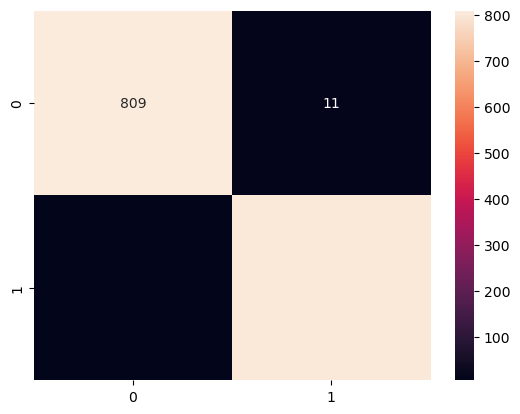

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       820
           1       0.99      0.99      0.99       805

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [20]:
# Confusion Matrix for Gini model
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.show()

# Classification Report for Gini model
print(classification_report(y_test, y_pred_gini))


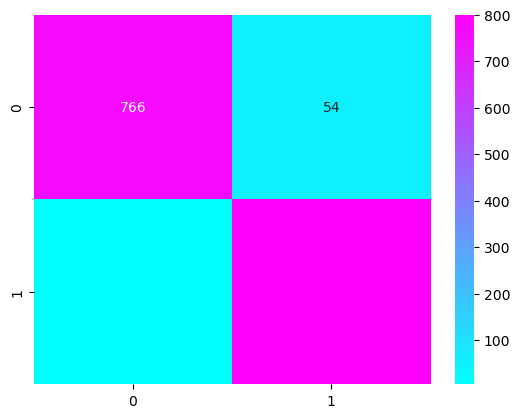

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [23]:
# Confusion Matrix for Entropy model
cm = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

# Classification Report for Entropy model
print(classification_report(y_test, y_pred_entropy))

## Logistic Regression with Recursive Feature Elimination (RFE)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE

In [25]:
# Initialize logistic regression model with regularization (C=0.01) and maximum iterations (1000)
log_reg = LogisticRegression(max_iter=1000, C=0.01)

# Perform RFE to select top 10 features
selector = RFE(log_reg, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

# Transform the data to keep only the selected features
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

# Refit the logistic regression model on the selected features
log_reg.fit(X_train_rfe, y_train)

# Predict the values for the test set
y_pred_log_reg = log_reg.predict(X_test_rfe)

# Determine the accuracy score
print('Logistic Regression Model accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_log_reg)))

Logistic Regression Model accuracy: 0.9778


#### Evaluate Logistic Regression Model

Confusion Matrix:



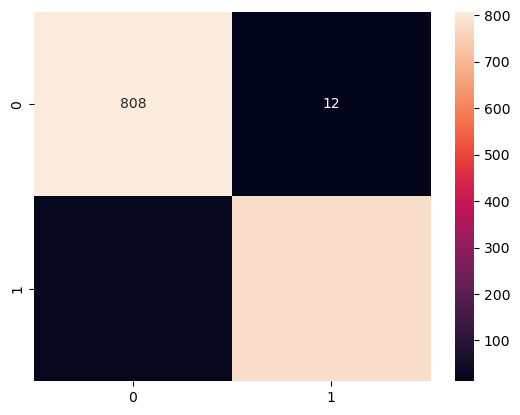

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       820
           1       0.98      0.97      0.98       805

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [37]:
# Confusion Matrix for Logistic Regression model
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='rocket')
print('Confusion Matrix:\n')
plt.show()

# Classification Report for Logistic Regression model
print('Classification Report:\n', classification_report(y_test, y_pred_log_reg))

### Authored by : Aryan Agrawal